In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
courses = pd.read_csv("dataset.csv")
courses = courses.drop_duplicates()
courses.head(10)

,indexValue,studentID,gender,stream,subject,marks,course
0,0,12245,male,science,physics,48,btech
1,1,12246,male,science,chemistry,58,bsc
2,2,12247,female,commerce,math,78,bsc
3,3,12248,male,science,physics,47,btech
4,4,12249,male,commerce,economics,46,bcom
5,5,12250,female,commerce,math,97,bsc
6,6,12251,female,science,chemistry,67,btech
7,7,12252,female,science,physics,76,btech
8,8,12253,female,humanities,history,67,ba
9,9,12254,male,science,physics,47,btech


In [3]:
courses.columns

Index(['indexValue', 'studentID', 'gender', 'stream', 'subject', 'marks',
       'course'],
      dtype='object')

In [4]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   indexValue  109 non-null    int64 
 1   studentID   109 non-null    int64 
 2   gender      109 non-null    object
 3   stream      109 non-null    object
 4   subject     109 non-null    object
 5   marks       109 non-null    int64 
 6   course      109 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


<AxesSubplot:xlabel='course'>

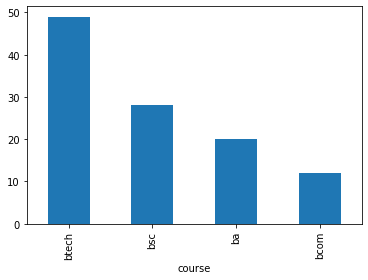

In [5]:
courses_group= courses.groupby('course')['studentID'].count().sort_values(ascending=False).head(30)
courses_group.plot.bar()

<AxesSubplot:ylabel='Frequency'>

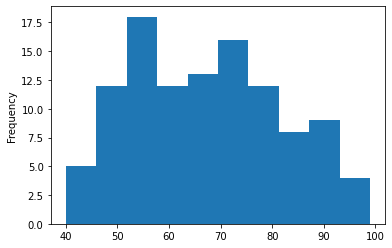

In [6]:
marks_rate = courses[courses['marks']<99]
courses['marks'].plot.hist()

<AxesSubplot:ylabel='studentID'>

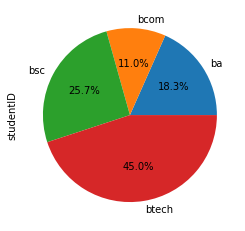

In [7]:
courses.groupby('course')['studentID'].count().plot.pie(autopct = "%1.1f%%")

<AxesSubplot:xlabel='subject'>

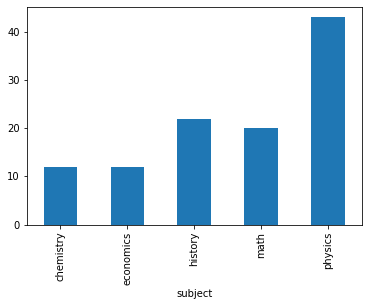

In [8]:
 courses.groupby('subject')['studentID'].count().plot.bar()


In [9]:
selected_features = ['studentID','subject',]
for feature in selected_features:
    courses[feature] = courses[feature].fillna('')

In [10]:
def combine_col(row):
    courses_rate =str(row['marks']) 
    student_id = str(row['studentID'])
    combine_features =student_id+' ' +row['subject']
    return combine_features
courses["studentID with subject"] = courses.apply(combine_col, axis=1) 

In [11]:
courses.head(10)

,indexValue,studentID,gender,stream,subject,marks,course,studentID with subject
0,0,12245,male,science,physics,48,btech,12245 physics
1,1,12246,male,science,chemistry,58,bsc,12246 chemistry
2,2,12247,female,commerce,math,78,bsc,12247 math
3,3,12248,male,science,physics,47,btech,12248 physics
4,4,12249,male,commerce,economics,46,bcom,12249 economics
5,5,12250,female,commerce,math,97,bsc,12250 math
6,6,12251,female,science,chemistry,67,btech,12251 chemistry
7,7,12252,female,science,physics,76,btech,12252 physics
8,8,12253,female,humanities,history,67,ba,12253 history
9,9,12254,male,science,physics,47,btech,12254 physics


In [12]:
features_vector = CountVectorizer()
count_matrix = features_vector.fit_transform(courses['studentID with subject'])
print("Count Matrix : ",count_matrix.toarray())
cosine_simi = cosine_similarity(count_matrix)

Count Matrix :  [[1 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [13]:
student_input = input("Enter Your completed  subject: ")
student_previous_subject = student_input

def get_index_from_medicine(course):
    return courses[courses.subject == course]["indexValue"].values[0]
course_index = get_index_from_medicine(student_previous_subject)

similar_medicine = list(enumerate(cosine_simi[course_index]))
sorted_similar_course = sorted(similar_medicine, key=lambda x:x[1], reverse=True)

def get_course_from_index(index):
    return courses[courses.index == index]["course"].values[0]
i=0
for course_list in sorted_similar_course:
    print("--------------")
    print("|--Recommendation course with previous student's subject :>>>>"+get_course_from_index(course_list[0])+" --||-- ",course_list[1])
    i=i+1
    if i>7:
        break
        
    
    

Enter Your completed  subject: chemistry
--------------
|--Recommendation course with previous student's subject :>>>>bsc --||--  0.9999999999999998
--------------
|--Recommendation course with previous student's subject :>>>>btech --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>bsc --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>bsc --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>bsc --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>btech --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>bsc --||--  0.4999999999999999
--------------
|--Recommendation course with previous student's subject :>>>>btech --||--  0.4999999999999999
